### Blackjack game setting up using openai gym

#### TODO: Compare all the methods under the same simulation

In [1]:
def get_payout_results(num_rounds, num_samples, action_method):
    average_payouts = []
    for sample in range(num_samples):
        current_round = 1
        total_payout = 0  # to store total payout over 'num_rounds'
        
        while current_round <= num_rounds:
            action = action_method()  # take random action 
            obs, payout, is_done, _ = env.step(action)
            total_payout += payout
            if is_done:
                env.reset()  # Environment deals new cards to player and dealer
                current_round += 1
        average_payouts.append(total_payout)
        
    plt.plot(average_payouts)
    plt.xlabel('num_samples')
    plt.ylabel('payout after 1000 rounds')
    plt.show()
    print("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts) / num_samples))


#### The payout given by random pick

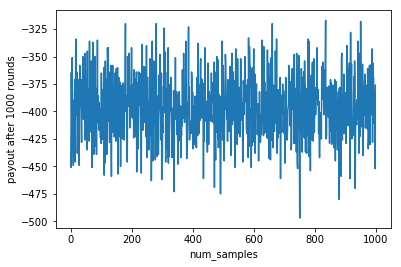

Average payout after 1000 rounds is -395.549


In [2]:
import gym
import matplotlib.pyplot as plt

env = gym.make('Blackjack-v0')
env.reset()

num_rounds = 1000 # Payout calculated over num_rounds
num_samples = 1000 # num_rounds simulated over num_samples
get_payout_results(num_rounds, num_samples, env.action_space.sample)


#### The payout given by some optimal strategy (rule base)

In [3]:
def normal_strategy(player_sum, dealer_up_card):
    """
    Returns appropriate action from a 2D array storing actions
    Actions obtained from figure 11 here- https://pdfs.semanticscholar.org/e1dd/06616e2d18179da7a3643cb3faab95222c8b.pdf
    Each row corresponds to player sum- from 2 to 21
    Each column corresponds to dealer_up_card- from 1 to 10
    """
    actions = [[1]*10]*8 # 2 to 9
    actions.append([1]*4 + [0]*2 + [1]*4) #10
    actions.append([1] + [0]*6 + [1]*3) #11
    actions.append([0] + [1]*9) #12
    actions.append([0]*2 + [1]*8) #13
    actions.append([0]*1 + [1]*9) #14
    actions.append([0]*2 + [1]*8) #15
    actions.append([0]*5 + [1]*5) #16
    actions.append([0]*4 + [1]*6) #17
    actions.extend([[0]*10]*4) # 18 to 21
    
    # dealer_up_card-2 takes care of input 1 which correcly looks up last column
    return actions[player_sum-2][dealer_up_card-2]

# Make sure actions have been stored correctly mainly when dealer's upcard is A
assert (normal_strategy(15, 2)) == 0
assert (normal_strategy(15, 1)) == 1

total_payout = 0 # to store total payout over 'num_rounds'

for _ in range(num_samples):
    round = 1
    while round <= num_rounds:
        player_sum, dealer_up_card, is_done = (env._get_obs())
        
        # Take action based on normal strategy stored above
        action = normal_strategy(player_sum, dealer_up_card) 
        
        obs, payout, is_done, _ = env.step(action)
        total_payout += payout
        if is_done:
            env.reset() # Environment deals new cards to player and dealer
            round += 1
    
print ("Average payout after {} rounds is {}".format(num_rounds, total_payout/num_samples))

Average payout after 1000 rounds is -100.82


#### The payout given by basic reinforcement learning method (q_learning etc)

#### The payout given by basic reinforcement learning method (q_learning etc) with some memory simulation

#### The payout given by basic reinforcement learning method (q_learning etc) with different betting strategy

#### The payout given by combination of all good results

### Comparison with human performance

### Human tester 1 

### Human tester2